Use this cell for all your imports

In [15]:
import numpy as np
from scipy.sparse import csr_matrix
import networkx as nx
import matplotlib.pyplot as plt

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [16]:
with open('data.txt', 'r') as f:
    next(f)  # skip the first line
    next(f)  # skip the second line
    next(f)  # skip the third line
    data = [tuple(map(int, line.strip().split())) for line in f if not line.startswith('#')]

Use this cell to normalize the matrix as you see fit.

In [17]:
n_nodes = max(max(pair) for pair in data)
row = [pair[0]-1 for pair in data]  
col = [pair[1]-1 for pair in data]  
adjacency_matrix = csr_matrix(([1]*len(data), (row, col)), shape=(n_nodes, n_nodes))

Apply the PageRank algorithm to the matrix you created.

In [18]:
edges = [(pair[0], pair[1]) for pair in data]

graph = nx.DiGraph()
graph.add_edges_from(edges)

pagerank_scores = nx.pagerank(graph)

top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_nodes:
    print(f"Node: {node}, Score: {score:.6f}")

Node: 9407087, Score: 0.006239
Node: 9503124, Score: 0.004633
Node: 9510017, Score: 0.004385
Node: 9402044, Score: 0.003935
Node: 9711200, Score: 0.003410
Node: 9410167, Score: 0.003407
Node: 9408099, Score: 0.003190
Node: 9207016, Score: 0.003114
Node: 9402002, Score: 0.002962
Node: 9610043, Score: 0.002753


Output a list of the 100 most important papers along with their importance

In [19]:
pagerank_scores = nx.pagerank(graph)


sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

for node, score in sorted_nodes[:100]:
    print(f"Paper ID: {node}\tImportance Score: {score}")

Paper ID: 9407087	Importance Score: 0.006238910935211853
Paper ID: 9503124	Importance Score: 0.004632588508880592
Paper ID: 9510017	Importance Score: 0.00438516933679889
Paper ID: 9402044	Importance Score: 0.00393534733441006
Paper ID: 9711200	Importance Score: 0.003409682539237114
Paper ID: 9410167	Importance Score: 0.003407370515336668
Paper ID: 9408099	Importance Score: 0.0031898690485387365
Paper ID: 9207016	Importance Score: 0.003113861363851895
Paper ID: 9402002	Importance Score: 0.002962458707729361
Paper ID: 9610043	Importance Score: 0.0027529030118643707
Paper ID: 9205068	Importance Score: 0.0026620045653103336
Paper ID: 9510135	Importance Score: 0.0025914346362725252
Paper ID: 9201015	Importance Score: 0.0025543499779128705
Paper ID: 9205027	Importance Score: 0.0024590344235207264
Paper ID: 9304154	Importance Score: 0.002332519070232545
Paper ID: 9802150	Importance Score: 0.002255515474336817
Paper ID: 9401139	Importance Score: 0.0022459538984583504
Paper ID: 9504090	Importan

Visualize your results

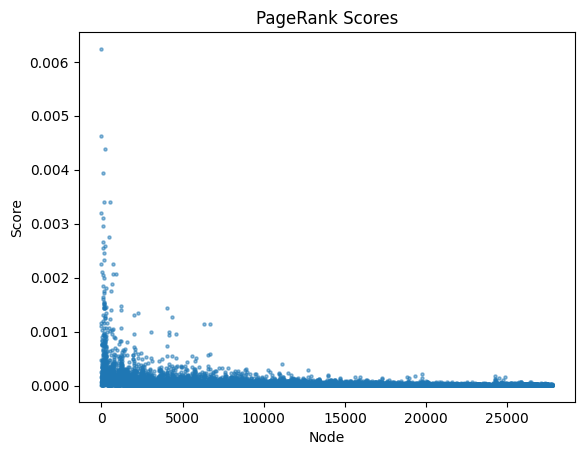

In [20]:
# Get the PageRank scores for the nodes in the graph
pagerank_scores = np.array(list(nx.pagerank(G).values()))

# Create a scatter plot of the PageRank scores
plt.scatter(range(len(pagerank_scores)), pagerank_scores, s=5, alpha=0.5)
plt.title("PageRank Scores")
plt.xlabel("Node")
plt.ylabel("Score")
plt.show()
